## Analyse Benchmark Testbed

In [1]:
%load_ext autoreload
import trafpy
import trafpy.generator as tpg

import os
import pickle

DATA_NAME = 'social_media_cloud_k_4_L_2_n_4_chancap500_numchans1_mldat2e6_bidirectional'
# DATA_NAME = 'ndf50_mldat6e6_load0.4_university'
path_to_benchmark_data = '/scratch/datasets/trafpy/management/flowcentric/{}_testbed_data_v3.obj'.format(DATA_NAME)
filehandler = open(path_to_benchmark_data, 'rb')
tb_dict = pickle.load(filehandler)

print(tb_dict.keys())

dict_keys(['benchmark_data', 'benchmarks', 'envs', 'config'])


In [2]:
%autoreload
# unpack env dicts into list of env objects
envs = tb_dict['envs']

In [3]:
%autoreload
import trafpy
from trafpy.manager import EnvAnalyser, EnvsPlotter

# analyse
analysers = [EnvAnalyser(env, time_units='\u03BCs', info_units='B', subject_class_name=env.scheduler.scheduler_name) for env in envs]
for analyser in analysers:
    analyser.compute_metrics(measurement_start_time='auto',
                             measurement_end_time='auto',
                             print_summary=True)



-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_social_media_cloud_load_0.5_repeat_0_scheduler_SRPT'
Measurement duration: 5041979.289898818 (Start time : 560219.9210998687 μs | End time: 5602199.210998687 μs)
Total number of generated demands (jobs or flows) passed to env: 267817
Total number of these demands which arrived during measurement period: 240081
Total info arrived: 10027992650.0 B
Total info transported: 10013378312.0 B
Load (abs): 1988.900007996907 B/μs
Load (frac): 0.49722500199922676 fraction of network capacity requested.
Throughput (abs): 1986.0014760594042 B/μs
Throughput (frac): 0.9985426457208263 fraction of arrived info successfully transported.
T-Score: 83.50062122900448

 ~* Flow Information *~
Total number of generated flows passed to env (src != dst, dependency_type == 'data_dep'): 267817
Total number of these flows which arrived during measurement period: 240081
Time first flow arrived: 560220.5990130571 μs
Tim



-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_social_media_cloud_load_0.3_repeat_0_scheduler_Rand'
Measurement duration: 8373827.606247632 (Start time : 930425.2895830702 μs | End time: 9304252.895830702 μs)
Total number of generated demands (jobs or flows) passed to env: 267817
Total number of these demands which arrived during measurement period: 241783
Total info arrived: 10069426963.0 B
Total info transported: 10065343397.0 B
Load (abs): 1202.4879704338907 B/μs
Load (frac): 0.30062199260847267 fraction of network capacity requested.
Throughput (abs): 1202.000312197775 B/μs
Throughput (frac): 0.9995944589483587 fraction of arrived info successfully transported.
T-Score: 83.33809922447251

 ~* Flow Information *~
Total number of generated flows passed to env (src != dst, dependency_type == 'data_dep'): 267817
Total number of these flows which arrived during measurement period: 241783
Time first flow arrived: 930452.063248203 μs
Time



-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_social_media_cloud_load_0.2_repeat_0_scheduler_FS'
Measurement duration: 12624205.273866896 (Start time : 1402689.4748740997 μs | End time: 14026894.748740995 μs)
Total number of generated demands (jobs or flows) passed to env: 267817
Total number of these demands which arrived during measurement period: 238462
Total info arrived: 9980150062.0 B
Total info transported: 9979560436.0 B
Load (abs): 790.5567000450873 B/μs
Load (frac): 0.19763917501127182 fraction of network capacity requested.
Throughput (abs): 790.5099940555054 B/μs
Throughput (frac): 0.999940920126818 fraction of arrived info successfully transported.
T-Score: 84.4818266268553

 ~* Flow Information *~
Total number of generated flows passed to env (src != dst, dependency_type == 'data_dep'): 267817
Total number of these flows which arrived during measurement period: 238462
Time first flow arrived: 1403750.431081376 μs
Time la



-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_social_media_cloud_load_0.1_repeat_0_scheduler_FF'
Measurement duration: 27709700.867977343 (Start time : 3078855.6519974824 μs | End time: 30788556.519974824 μs)
Total number of generated demands (jobs or flows) passed to env: 294598
Total number of these demands which arrived during measurement period: 267546
Total info arrived: 11180476109.0 B
Total info transported: 11179953680.0 B
Load (abs): 403.4859907824084 B/μs
Load (frac): 0.10087149769560211 fraction of network capacity requested.
Throughput (abs): 403.46713713247226 B/μs
Throughput (frac): 0.9999532730990248 fraction of arrived info successfully transported.
T-Score: 84.93964734584387

 ~* Flow Information *~
Total number of generated flows passed to env (src != dst, dependency_type == 'data_dep'): 294598
Total number of these flows which arrived during measurement period: 267546
Time first flow arrived: 3079304.1390389837 μs
T

In [4]:
# TEMPORARY CELL FOR RENAMING ANY PREVIOUSLY SAVED SCHEDULER NAMES WITH NEW SHORTENED CONVENTION
for analyser in analysers:
    if analyser.env.scheduler.scheduler_name == 'fair_share':
        analyser.env.scheduler.scheduler_name = 'FS'
    elif analyser.env.scheduler.scheduler_name == 'first_fit':
        analyser.env.scheduler.scheduler_name = 'FF'
    elif analyser.env.scheduler.scheduler_name == 'random':
        analyser.env.scheduler.scheduler_name = 'Rand'
    elif analyser.env.scheduler.scheduler_name == 'srpt_v2':
        analyser.env.scheduler.scheduler_name = 'SRPT'
    elif analyser.env.scheduler.scheduler_name[0:6] == 'lambda':
        analyser.env.scheduler.scheduler_name = '\u03BB' + str(analyser.env.scheduler._lambda) + 'S'
    analyser.subject_class_name = analyser.env.scheduler.scheduler_name

Load Subject    T-Score  Mean FCT (μs)  p99 FCT (μs)  Max FCT (μs)  \
0    0.1    SRPT  84.997675          218.6        2396.9       16618.3   
1    0.1      FS  84.971738          260.8        2581.2       15682.7   
2    0.1    Rand  84.958735          270.4        2684.4       18305.5   
3    0.1      FF  84.939647          287.0        2846.3       20343.6   
4    0.2    SRPT  84.503281          268.5        3256.2       40058.9   
5    0.2      FS  84.481827          358.6        3687.5       35117.4   
6    0.2    Rand  84.404180          396.0        4142.6       40208.9   
7    0.2      FF  84.235979          423.1        4276.5       37439.8   
8    0.3    SRPT  84.032855          334.3        4485.6       44152.0   
9    0.3      FS  83.775255          489.0        5100.3       36852.0   
10   0.3      FF  83.399449          596.3        6057.0       34312.7   
11   0.3    Rand  83.338099          600.5        6715.0       44002.0   
12   0.4    SRPT  84.120065          422.9        6162.3      202052.3   
13   0.4      FS  83.854831          662.1        6861.2       72652.3   
14   0.4    Rand  83.671889          942.9       10893.8      149052.3   
15   0.4      FF  83.371667          837.8        8792.6      126855.3   
16   0.5    SRPT  83.500621          601.0        9648.7      230231.4   
17   0.5      FS  83.065759          990.3       10596.4      111757.1   
18   0.5      FF  82.785098         1348.1       15717.4      143543.3   
19   0.5    Rand  78.868191         1971.2       25936.1      296407.1   

    Throughput Frac  Frac Flows Dropped  Frac Info Dropped  
0          0.999953            0.000004           0.000047  
1          0.999953            0.000004           0.000047  
2          0.999953            0.000004           0.000047  
3          0.999953            0.000004           0.000047  
4          0.999941            0.000055           0.000059  
5          0.999941            0.000055           0.000059  
6          0.999935            0.000059           0.000065  
7          0.999928            0.000071           0.000072  
8          0.999699            0.000062           0.000301  
9          0.999669            0.000083           0.000331  
10         0.999692            0.000112           0.000308  
11         0.999594            0.000116           0.000406  
12         0.999725            0.000064           0.000275  
13         0.999697            0.000087           0.000303  
14         0.999668            0.000098           0.000332  
15         0.999716            0.000125           0.000284  
16         0.998543            0.000133           0.001460  
17         0.998914            0.000171           0.001090  
18         0.999060            0.000192           0.000940  
19         0.996168            0.000516           0.003830

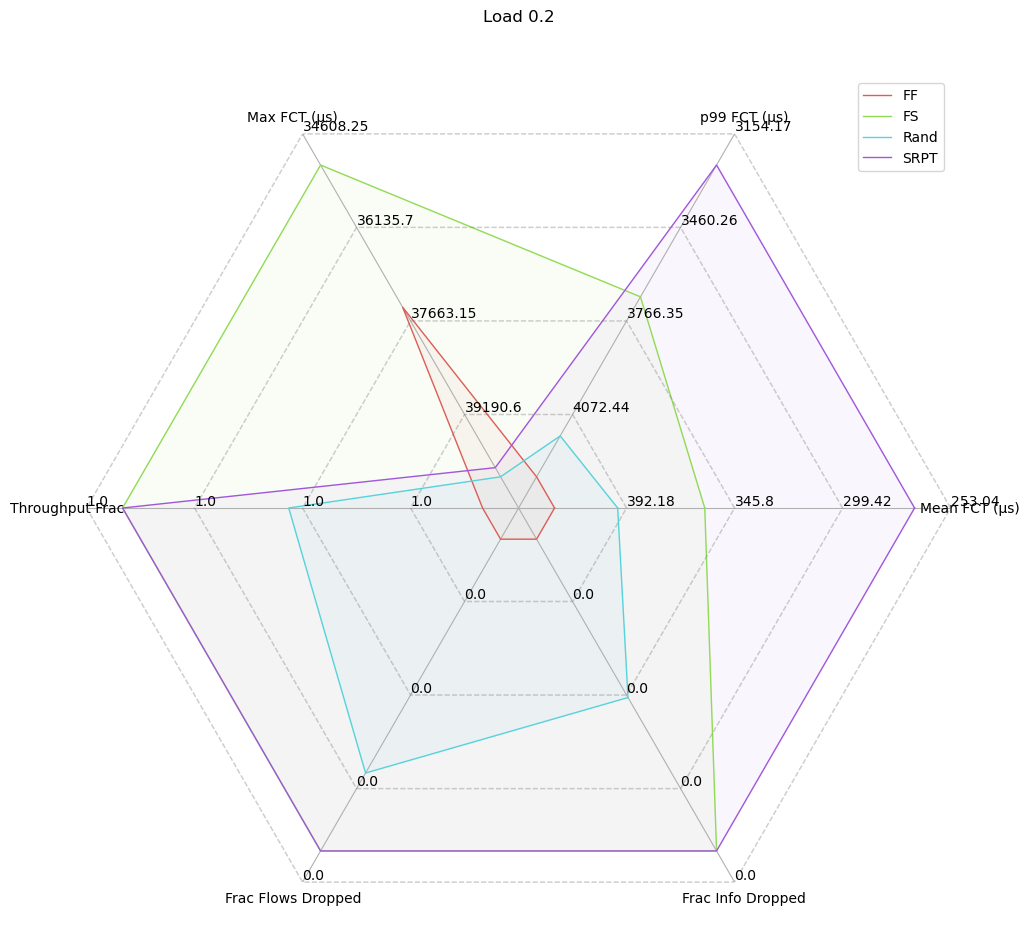

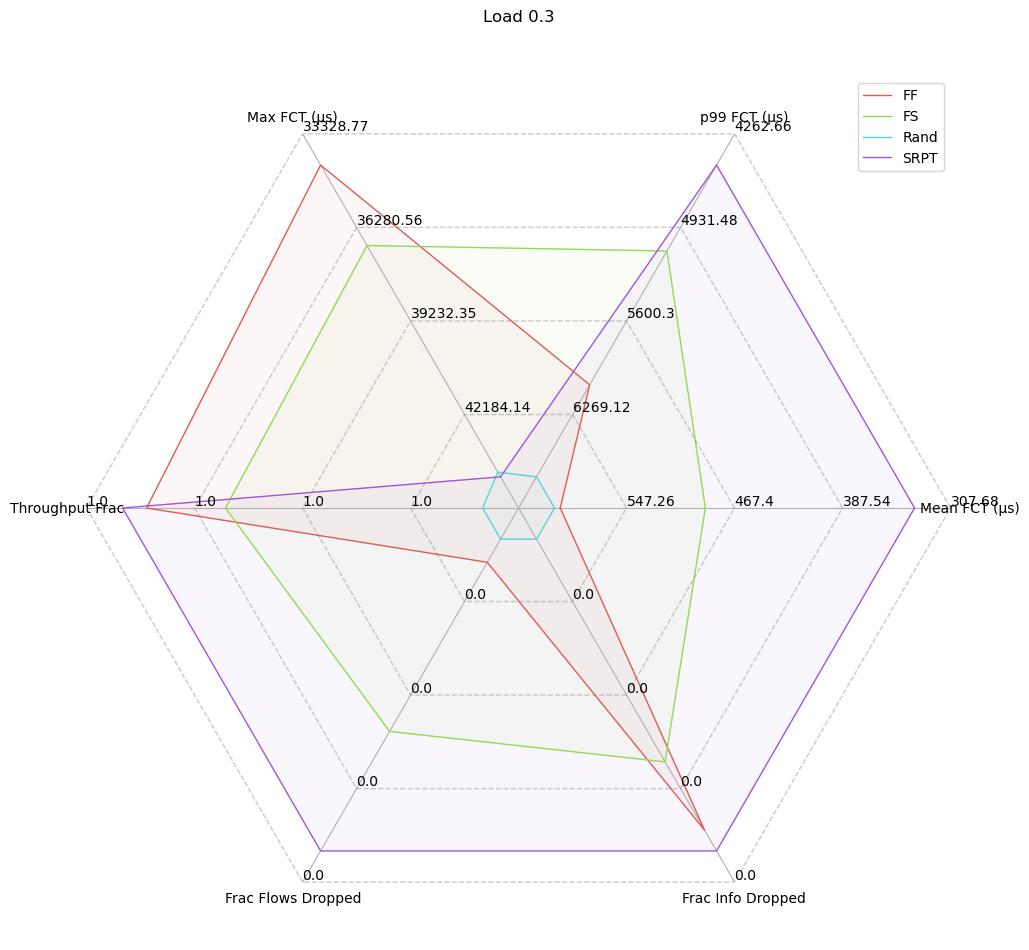

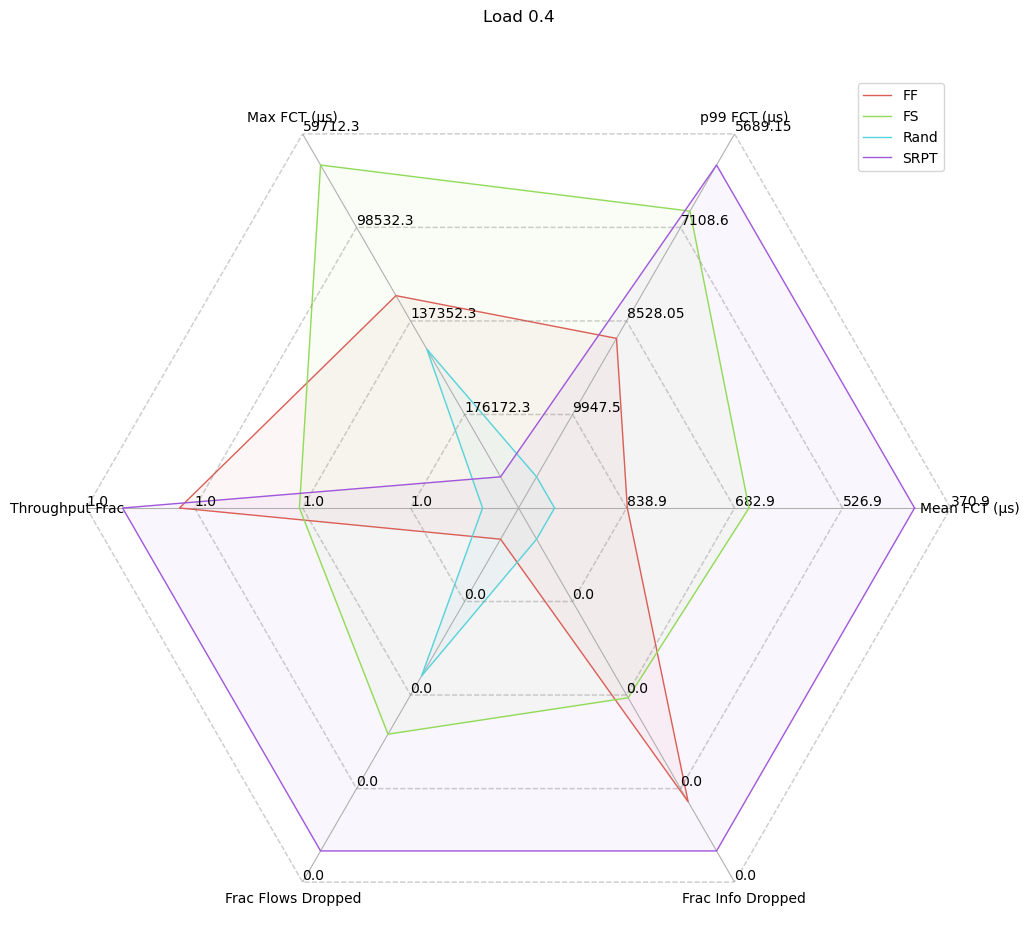

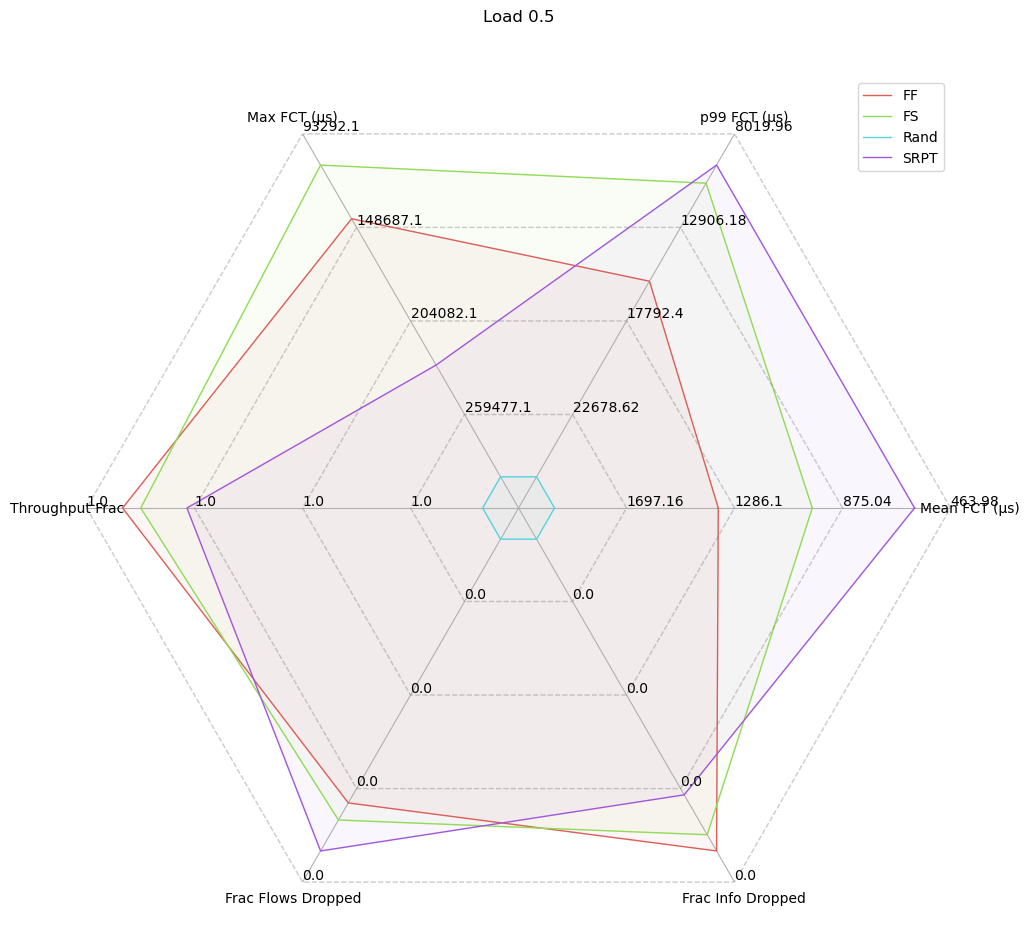

/home/zciccwf/phd_project/projects/trafpy/trafpy/generator/src/dists/plot_dists.py:583: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/home/zciccwf/phd_project/projects/trafpy/trafpy/generator/src/dists/plot_dists.py:583: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/home/zciccwf/phd_project/projects/trafpy/trafpy/generator/src/dists/plot_dists.py:583: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/home/zciccwf/phd_project/projects/trafpy/traf

/home/zciccwf/phd_project/projects/trafpy/trafpy/generator/src/dists/plot_dists.py:734: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/home/zciccwf/phd_project/projects/trafpy/trafpy/generator/src/dists/plot_dists.py:734: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/home/zciccwf/phd_project/projects/trafpy/trafpy/generator/src/dists/plot_dists.py:734: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

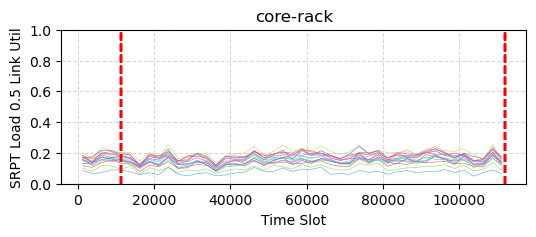

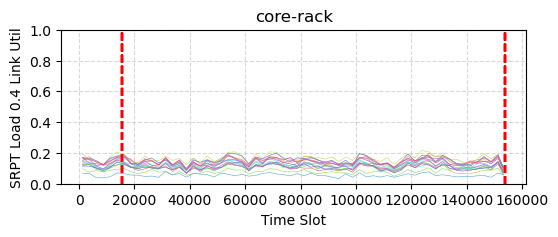

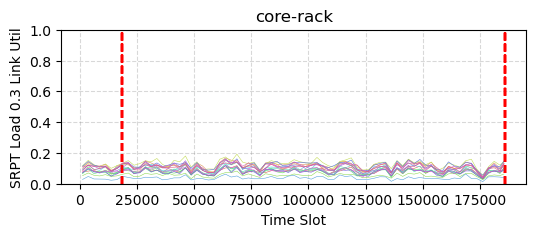

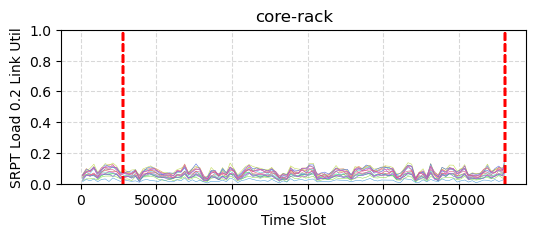

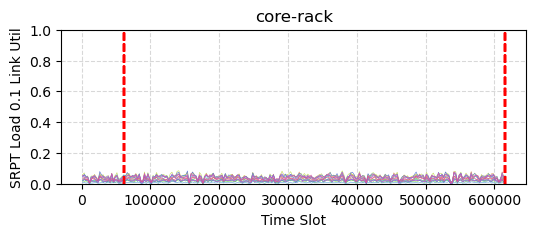

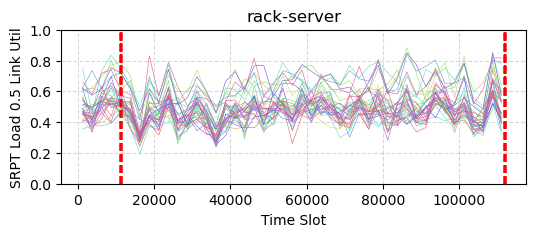

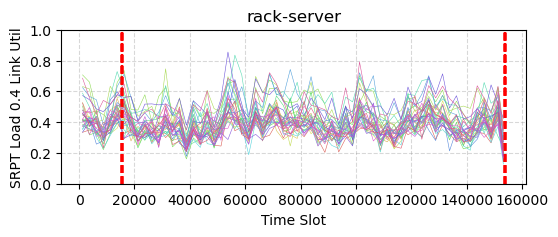

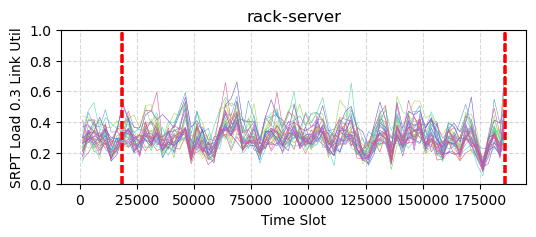

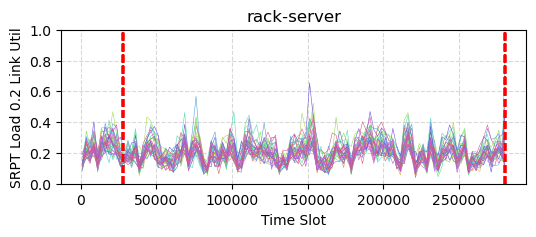

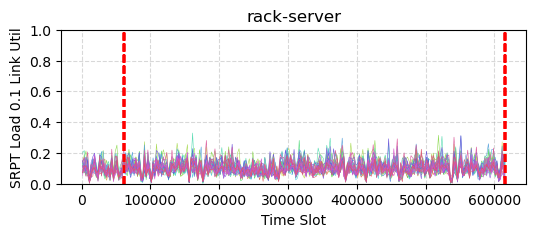

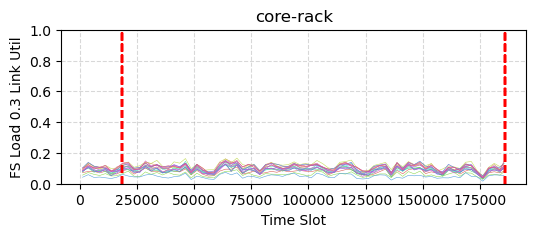

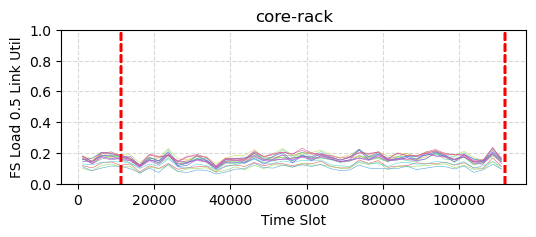

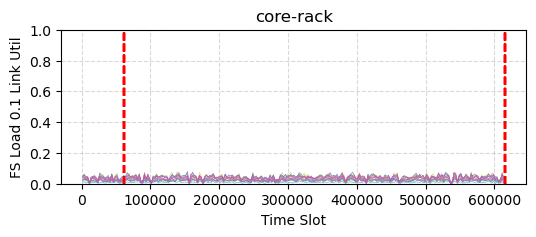

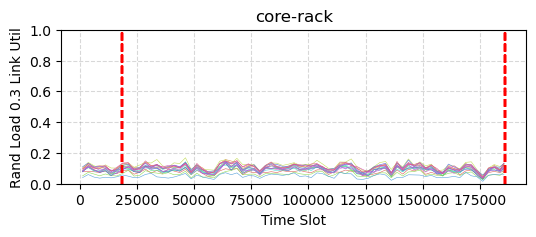

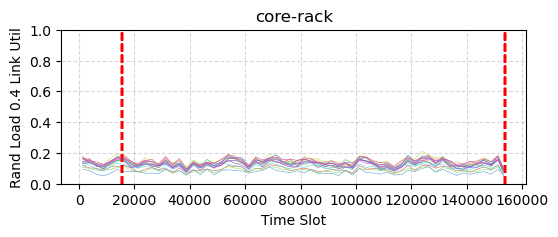

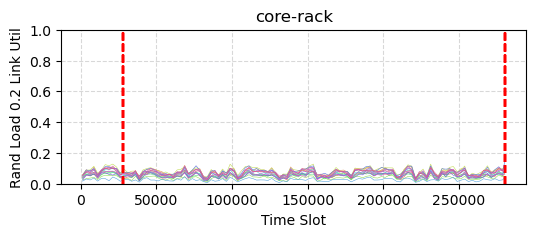

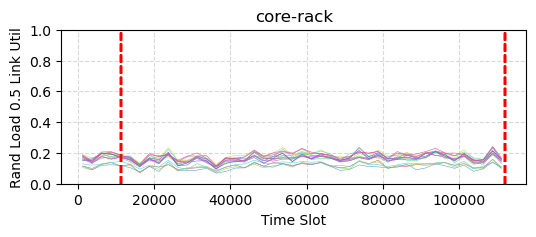

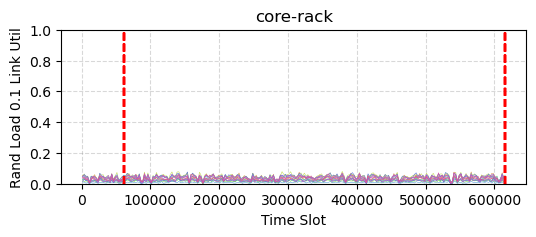

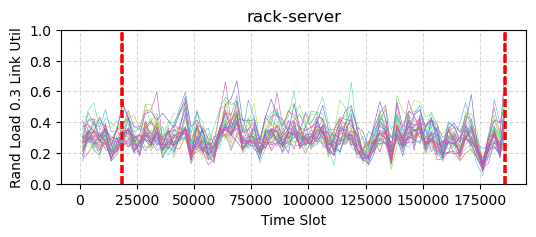

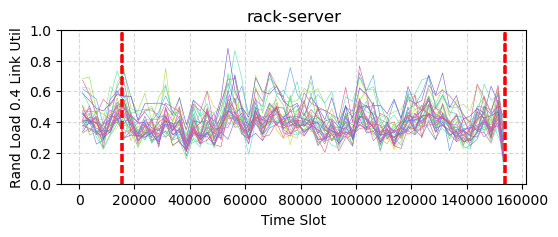

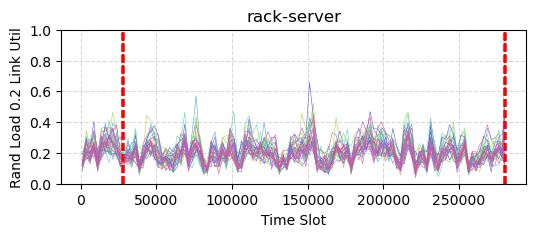

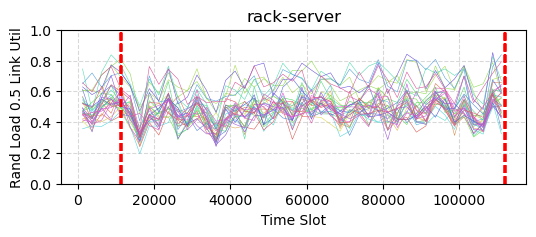

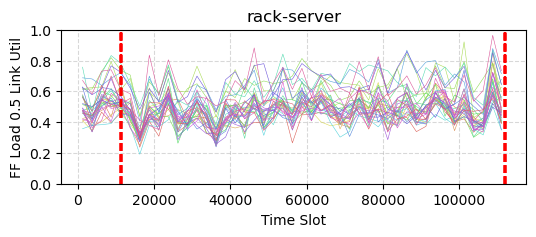

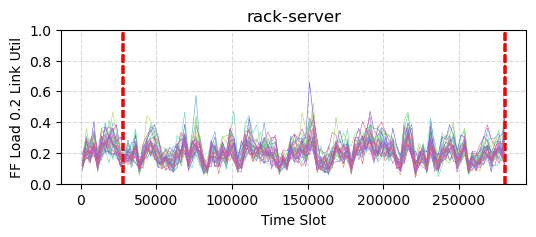

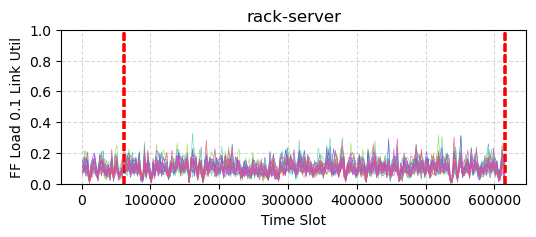

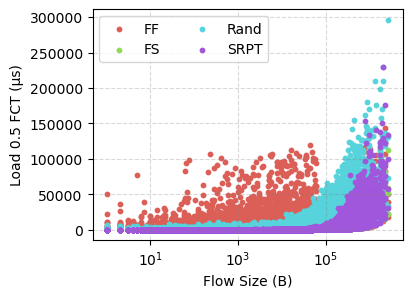

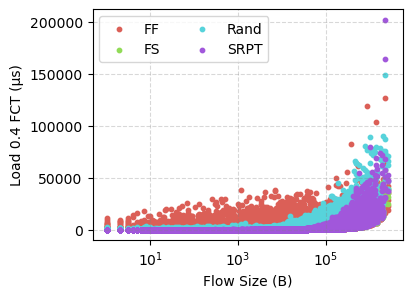

/home/zciccwf/.conda/envs/deep_scheduler/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


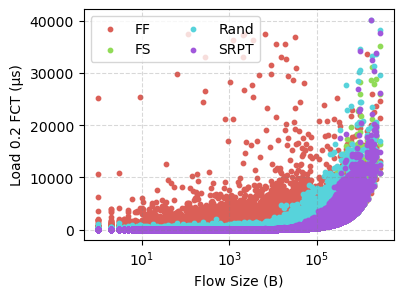

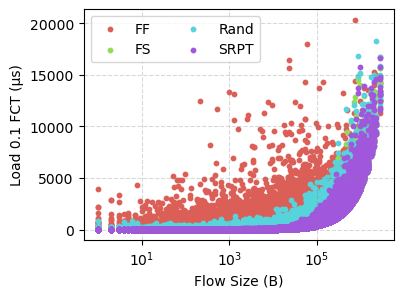

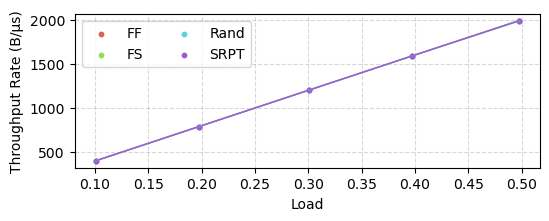

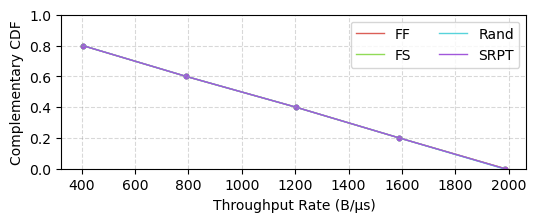

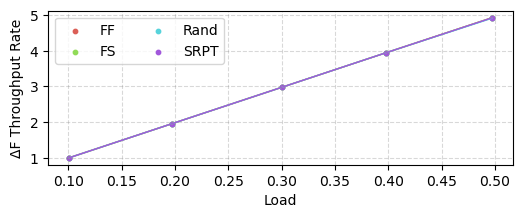

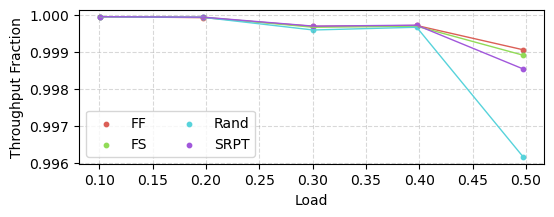

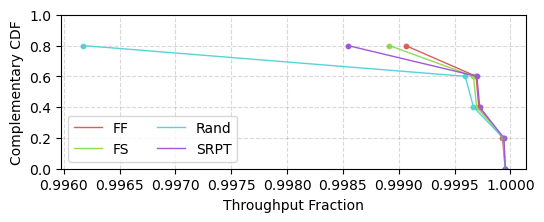

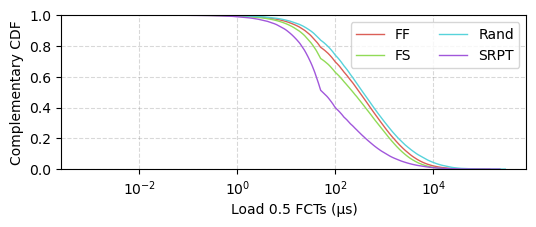

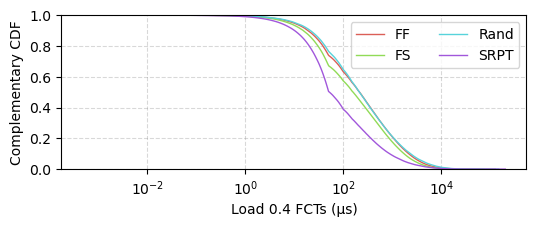

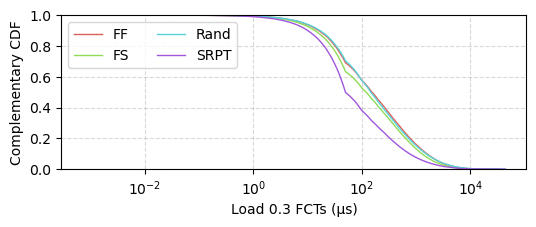

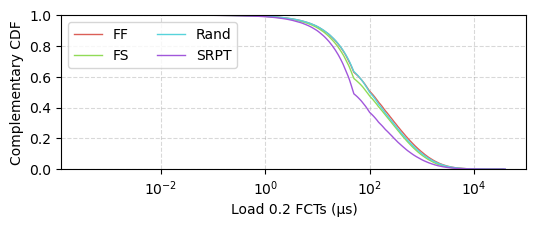

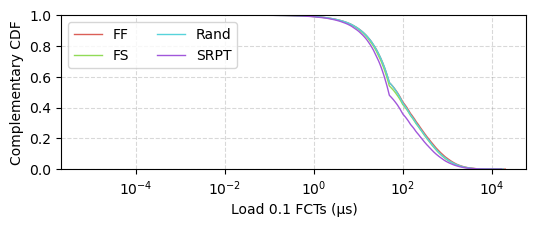

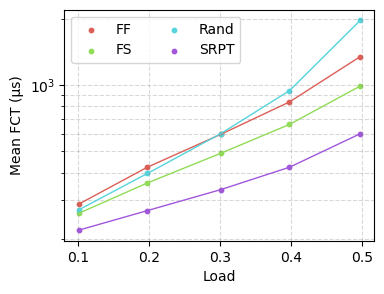

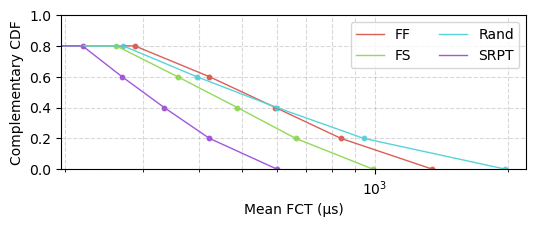

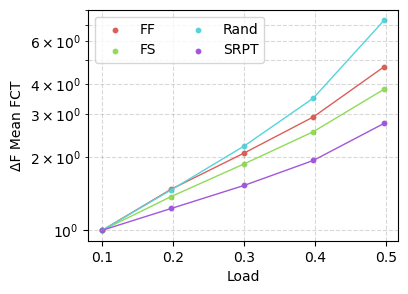

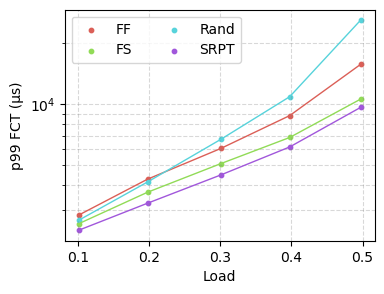

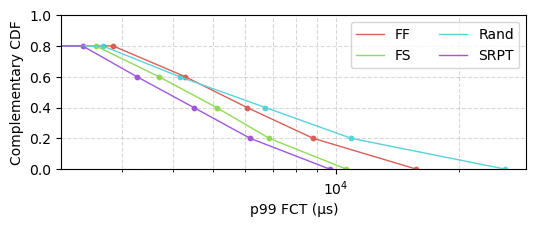

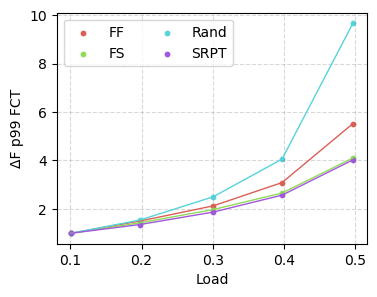

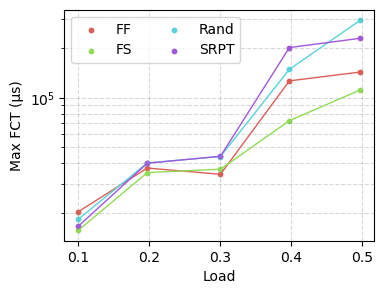

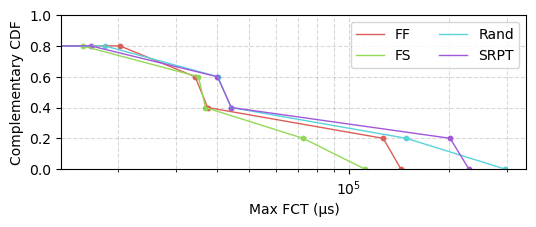

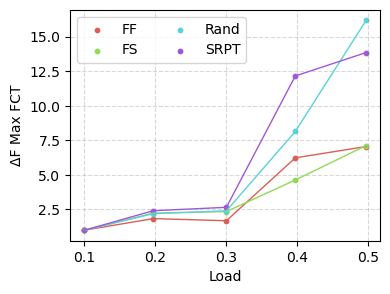

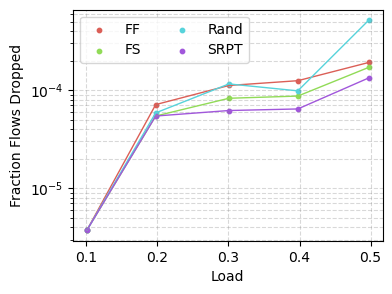

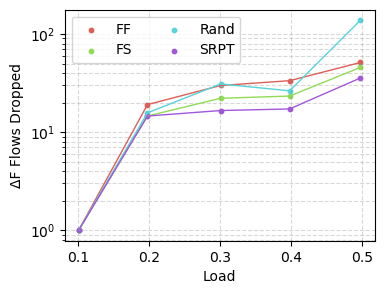

In [5]:
%autoreload
import trafpy
from trafpy.manager import EnvAnalyser, EnvsPlotter
    
# plot
plotter = EnvsPlotter(time_units='\u03BCs', info_units='B')
_ = plotter.display_t_score_table(*analysers, display_table=True)
# _ = plotter.plot_t_score_scatter(*analysers, gridlines=True, figsize=(4, 3), legend_ncol=2)

# COMMENT IF HAVEN'T TRACKED QUEUE EVOLUTION AND SCHEDULER DECISION COLOUR GRID
# _ = plotter.plot_src_dst_queue_evolution_for_different_loads('server_2', 'server_10', 'queue_lengths_num_flows', *analysers)
# _ = plotter.plot_src_dst_queue_evolution_for_different_loads('server_2', 'server_10', 'queue_lengths_info_units', *analysers)
# _ = plotter.plot_demand_slot_colour_grid_for_different_schedulers(*analysers)

# COMMENT IF WANT TO SAVE TIME
_ = plotter.plot_link_utilisation_vs_time_for_different_loads(*analysers, mean_period=2500, figsize=(6, 2), legend_ncol=2, plot_legend=False) # mean_period=2500
# _ = plotter.plot_link_concurrent_demands_vs_time_for_different_loads(*analysers, mean_period=500)




_ = plotter.plot_demand_completion_time_vs_size_for_different_loads(*analysers, gridlines=True, figsize=(4, 3), legend_ncol=2)
_ = plotter.plot_throughput_rate_vs_load(*analysers, plot_bar_charts=False, gridlines=True, figsize=(6, 2), legend_ncol=2)
_ = plotter.plot_throughput_frac_vs_load(*analysers, plot_bar_charts=False, gridlines=True, figsize=(6, 2), legend_ncol=2)
_ = plotter.plot_fcts_cdf_for_different_loads(*analysers, gridlines=True, figsize=(6, 2), legend_ncol=2)
_ = plotter.plot_mean_fct_vs_load(*analysers, logscale=True, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
_ = plotter.plot_99th_percentile_fct_vs_load(*analysers, logscale=True, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
_ = plotter.plot_max_fct_vs_load(*analysers, gridlines=True, logscale=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
_ = plotter.plot_fraction_of_arrived_flows_dropped_vs_load(*analysers, logscale=True, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)
_ = plotter.plot_fraction_of_arrived_info_dropped_vs_load(*analysers, logscale=True, gridlines=True, cdf_figsize=(6, 2), scatter_figsize=(4,3), legend_ncol=2)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


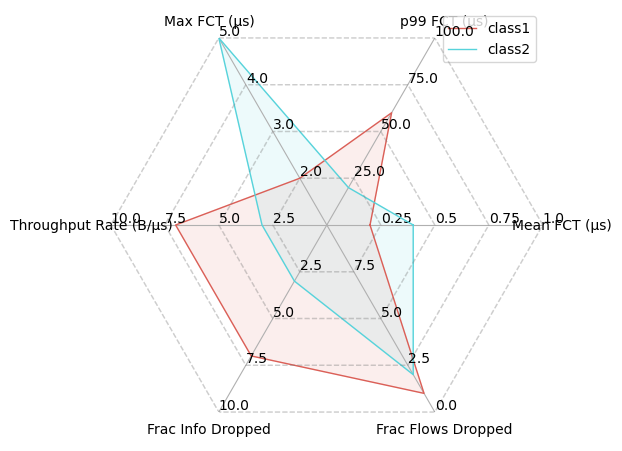

In [6]:
# CUSTOM RADAR PLOT(S)
%load_ext autoreload
%autoreload
import trafpy.generator as tpg

time_units = '\u03BCs'
info_units = 'B'

plot_dict = {'Mean FCT ({})'.format(time_units): {'range': [0, 1], 'classes': {'class1': 0.2,
                                                         'class2': 0.4}},
             'p99 FCT ({})'.format(time_units): {'range': [0, 100], 'classes': {'class1': 60,
                                                           'class2': 20}},
             'Max FCT ({})'.format(time_units): {'range': [1, 5], 'classes': {'class1': 2,
                                                         'class2': 5}},
             'Throughput Rate ({}/{})'.format(info_units, time_units): {'range': [0, 10], 'classes': {'class1': 7,
                                                          'class2': 3}},
             'Frac Info Dropped': {'range': [0, 10], 'classes': {'class1': 7,
                                                          'class2': 3}},
             'Frac Flows Dropped': {'range': [10, 0], 'classes': {'class1': 1,
                                                          'class2': 2}}
            }

_ = tpg.plot_radar(plot_dict)

# Custom Plots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


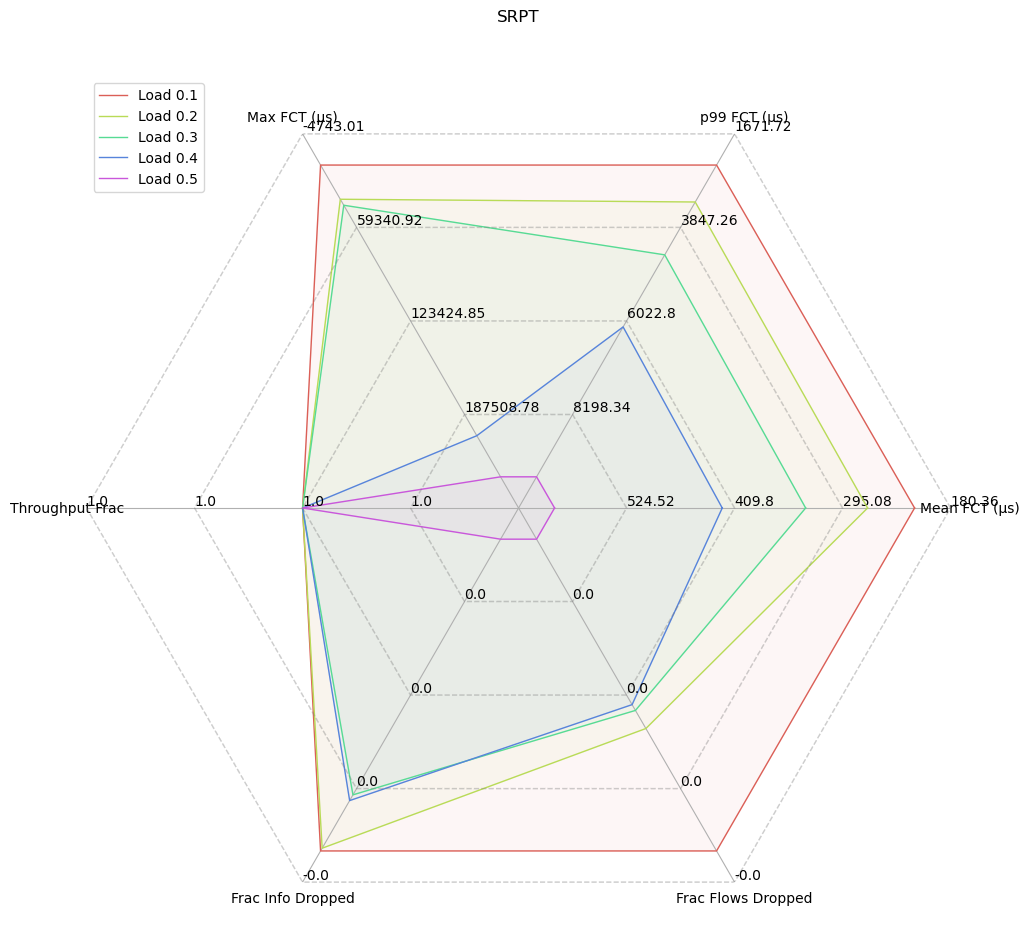

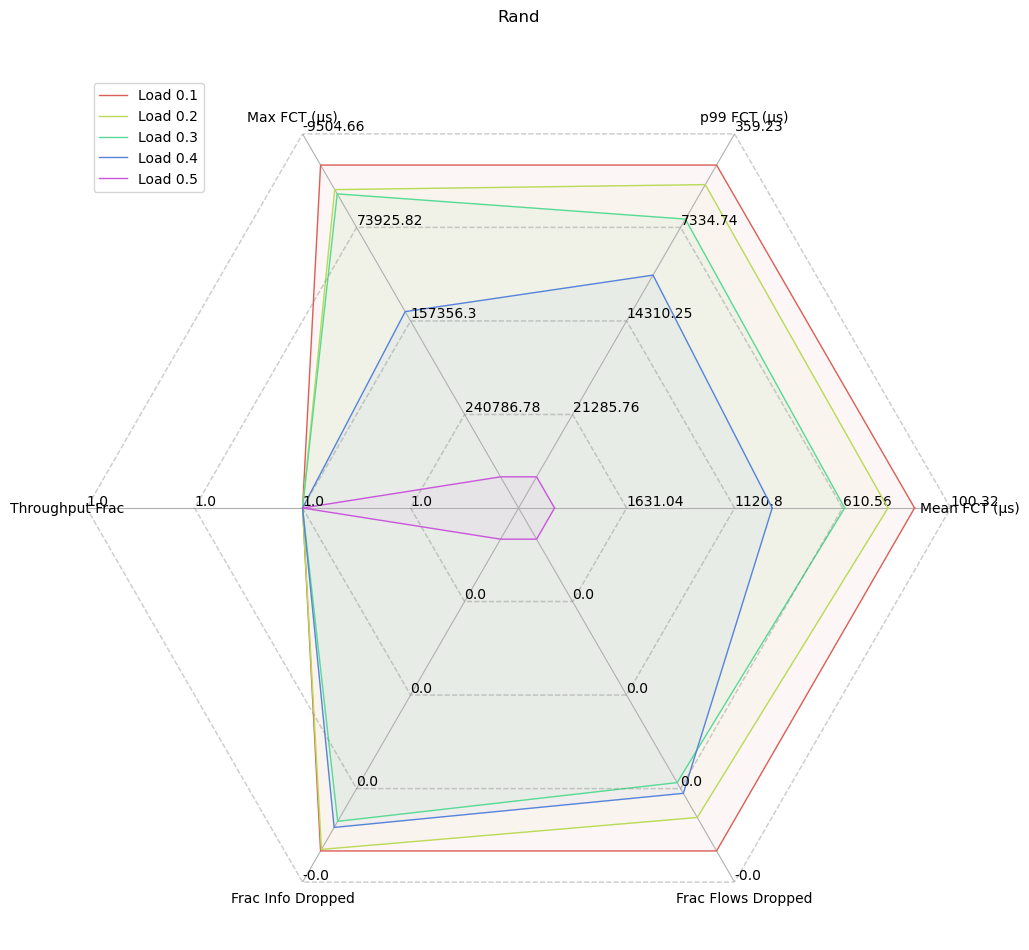

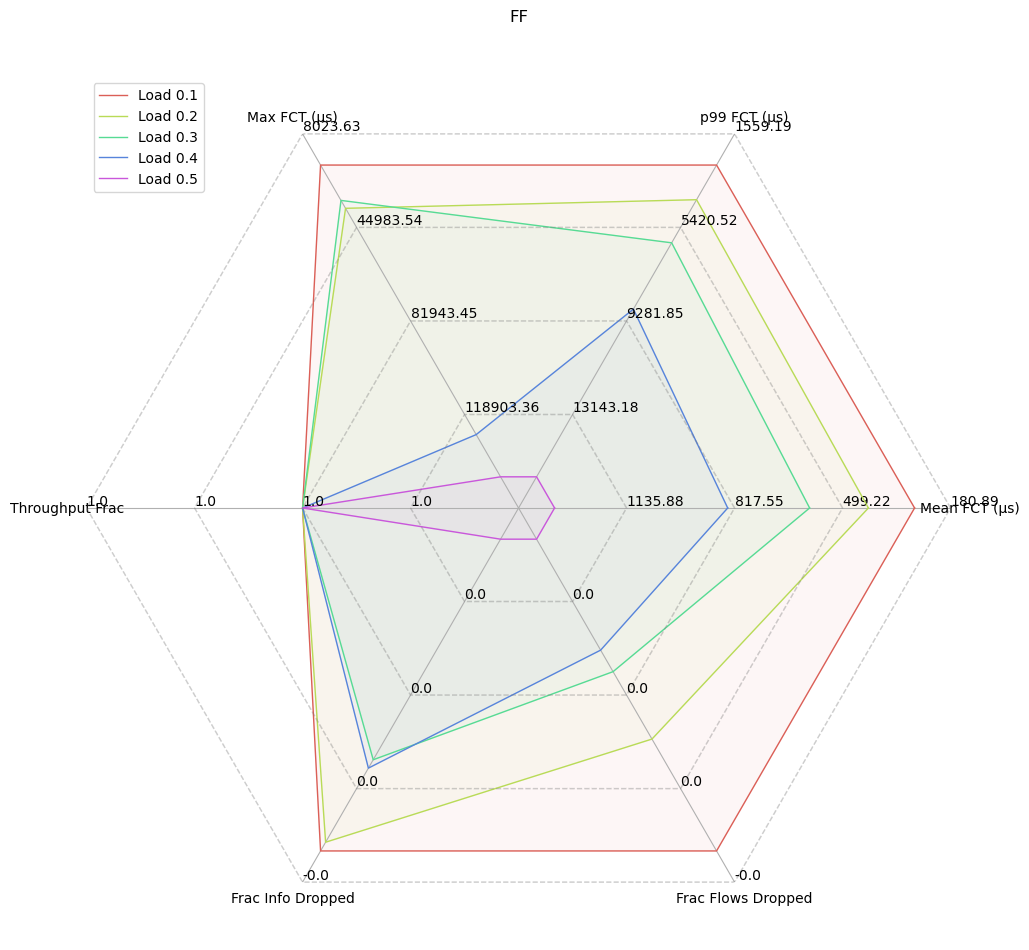

In [7]:
# PLOT SCHEDULER SENSITIVITY TO LOAD
%load_ext autoreload
%autoreload
import trafpy.generator as tpg

from collections import defaultdict
import sigfig


def get_summary_dict(analysers, headers, time_units='', info_units=''):
    summary_dict = {header: [] for header in headers}
    for analyser in analysers:
        # self._check_analyser_valid(analyser)
        summary_dict['Load'].append(round(analyser.load_frac, 2))
        summary_dict['Subject'].append(analyser.subject_class_name)
        summary_dict['T-Score'].append(analyser.t_score)
        summary_dict['Mean FCT ({})'.format(time_units)].append(round(analyser.mean_fct, 1))
        summary_dict['p99 FCT ({})'.format(time_units)].append(round(analyser.nn_fct, 1))
        summary_dict['Max FCT ({})'.format(time_units)].append(round(analyser.max_fct, 1))
        summary_dict['Throughput Frac'].append(round(analyser.throughput_frac, 1))
        summary_dict['Frac Flows Dropped'].append(sigfig.round(analyser.dropped_flow_frac, sigfigs=3))
        summary_dict['Frac Info Dropped'].append(sigfig.round(analyser.dropped_info_frac, sigfigs=3))
    return summary_dict



time_units = '\u03BCs'
info_units = 'B'
headers = ['Load',
           'T-Score',
           'Subject',
           'Mean FCT ({})'.format(time_units),
           'p99 FCT ({})'.format(time_units),
           'Max FCT ({})'.format(time_units),
           'Throughput Frac',
           'Frac Info Dropped',
           'Frac Flows Dropped']
dont_plot_headers = ['Load', 'T-Score', 'Subject']
plot_headers = [header for header in headers if header not in dont_plot_headers]
# determine if higher is better for each header
is_higher_better = {}
for header in headers:
    if header == 'T-Score' or header == 'Throughput Frac':
        is_higher_better[header] = True
    else:
        is_higher_better[header] = False

scheduler_to_analysers = {}
for analyser in analysers:
    if analyser.env.scheduler.scheduler_name not in scheduler_to_analysers:
        scheduler_to_analysers[analyser.env.scheduler.scheduler_name] = [analyser]
    else:
        scheduler_to_analysers[analyser.env.scheduler.scheduler_name].append(analyser)

for scheduler_name in scheduler_to_analysers.keys():
    nested_dict = lambda: defaultdict(nested_dict)
    plot_dict = nested_dict()
    
    anys = scheduler_to_analysers[scheduler_name]
    summary_dict = get_summary_dict(anys, headers, time_units=time_units, info_units=info_units)
    
    for header in plot_headers:
        min_val, max_val = min(summary_dict[header]), max(summary_dict[header])
        
#         if is_higher_better[header]:
#             # want higher (better) values on outer radar edge -> don't flip range
#             _range = [0.9*min(summary_dict[header]), 1.1*max(summary_dict[header])]
#         else:
#             # want lower (better) values on outer radar edge -> flip range
#             _range = [1.1*max(summary_dict[header]), 0.9*min(summary_dict[header])]
            
        diff = max(max_val - min_val, 1e-9)
        min_val -= (0.1*diff)
        max_val += (0.1*diff)
        _range = [min_val, max_val]
#         _range = [max(min_val, 1e-9), max(max_val, 1e-9)]
        if not is_higher_better[header]:
            # flip axis
            _range = _range[::-1]

        plot_dict[header]['range'] = _range
        for i, load in enumerate(summary_dict['Load']):
            plot_dict[header]['classes']['Load {}'.format(str(load))] = summary_dict[header][i]
        
    tpg.plot_radar(plot_dict, 
                   title=scheduler_name,
                   fill=True,
                   fill_alpha=0.05,
                   figsize=(12.8, 9.6))
        
    

In [8]:
# %autoreload
# import trafpy
# import trafpy.generator as tpg
# from trafpy.manager import RandomAgent, RWA, Demand, DCN, EnvAnalyser
# import json

# DATA_BAME = 'artificial_light_chancap10'
# path_to_benchmark_data = os.path.dirname(trafpy.__file__)+'/../data/benchmark_data/{}_benchmark_data.json'.format(DATA_NAME)
# benchmark_data = json.loads(tpg.load_data_from_json(path_to_benchmark_data))
# benchmarks = list(benchmark_data.keys())

# SLOT_SIZE = 1.0
# PACKET_SIZE = 1
# NUM_CHANNELS = 1
# NUM_K_PATHS = 1
# MAX_FLOWS = 10
# MAX_TIME = None

In [9]:
# network = tpg.gen_fat_tree(k=3, N=2, num_channels=1, server_to_rack_channel_capacity=10)
# rwa = RWA(tpg.gen_channel_names(NUM_CHANNELS), NUM_K_PATHS)
# scheduler = RandomAgent(network, rwa, slot_size=SLOT_SIZE, packet_size=PACKET_SIZE)

# num_benchmark_tests = 0
# for benchmark in benchmarks:
#     for load in benchmark_data[benchmark]:
#         for repeat in benchmark_data[benchmark][load]:
#             num_benchmark_tests += 1

# for benchmark in benchmarks:
#     for load in list(benchmark_data[benchmark].keys()):
#         for repeat in benchmark_data[benchmark][load]:
#             if json.loads(load) == 0.1 and scheduler.scheduler_name == 'random':
#                 demand_data = benchmark_data[benchmark][load][repeat]
#                 demand = tpg.Demand(demand_data)
#                 env = DCN(network, demand, scheduler, num_k_paths=NUM_K_PATHS, slot_size=SLOT_SIZE, max_flows=MAX_FLOWS, max_time=MAX_TIME)
#                 print(env.slot_size)
                
#                 observation = env.reset()
#                 scheduler.register_env(env)
                
#                 while True:
#                     action = scheduler.get_action(observation)
#                     observation, reward, done, info = env.step(action)
                    
#                     if done:
#                         print('Completed')
#                         analyser = EnvAnalyser(env)
#                         analyser.compute_metrics(print_summary=True)

In [10]:
# packet size = info
# slot size = sec
# min bandwidth in network = info per sec

# assume that 1 packet size of info can be transferred per sub slot
# info per sub slot = 1 packet = packet size
# sub slot size = (info per sub slot / min bandwidth in network) * slot size

In [11]:
a = None
if a is not None:
    print('not none')
else:
    print('None')

None


In [12]:
increment_time = 1.001
print(round(1-(increment_time-1),6))

0.999


In [13]:
ep_link_capacity = 500
